#Daily Challenge

## Download and import the Data Science Job Salary dataset here.

## Identify and differentiate between quantitative and qualitative data within the dataset.

## Preprocess the data by handling missing values and removing duplicates if needed.

## Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.

## Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.


In [1]:
# Step 1: Load dataset ds_salaries.csv
import pandas as pd
import seaborn as sns
import numpy as np

from google.colab import files #ensure Colab can access this file
uploaded = files.upload()

df = pd.read_csv("ds_salaries.csv")
print(df.shape)
print(df.dtypes)
print(df.head(90))
print(df.info())

Saving ds_salaries.csv to ds_salaries.csv
(607, 12)
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
    Unnamed: 0  work_year experience_level employment_type  \
0            0       2020               MI              FT   
1            1       2020               SE              FT   
2            2       2020               SE              FT   
3            3       2020               MI              FT   
4            4       2020               SE              FT   
..         ...        ...              ...             ...   
85          85       2021               MI              FT   
86          86       2021               EN              FT   
87          87       2021   

In [2]:
# Step 2: Identify and differentiate between quantitative and qualitative data within the dataset.

df.dtypes

##Quantitative: Unnamed (Integer), Work Year (Integer), salary, salary_in_usd, remote_ratio
## Categorical/Qualitative: experience_level, employment_type, salary_currency, employee_residence, company_location, company_size

,0
Unnamed: 0,int64
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64


In [4]:
###Data Quality - Check for missing values, then see what types of results we're working with for the columsn we care about
print(df.isnull().sum().sort_values(ascending=False)) # no missing values

duplicate_mask = df.duplicated()
print(df[duplicate_mask]) #no duplicates

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [11]:
#Clean Up
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['job_title'].unique())
print(df['salary_currency'].unique())
print(df['employee_residence'].unique())
print(df['company location'].unique())
print(df['company_size'].unique())



['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Spec

KeyError: 'company location'

In [22]:
# Step 4: Groupwise

#Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.

summary = df.groupby(["experience_level"])["salary_in_usd"].agg(["mean", "median"])
print(summary)

                           mean    median
experience_level                         
EN                 61643.318182   56500.0
EX                199392.038462  171437.5
MI                 87996.056338   76940.0
SE                138617.292857  135500.0


                           mean    median
experience_level                         
EX                199392.038462  171437.5
SE                138617.292857  135500.0
MI                 87996.056338   76940.0
EN                 61643.318182   56500.0


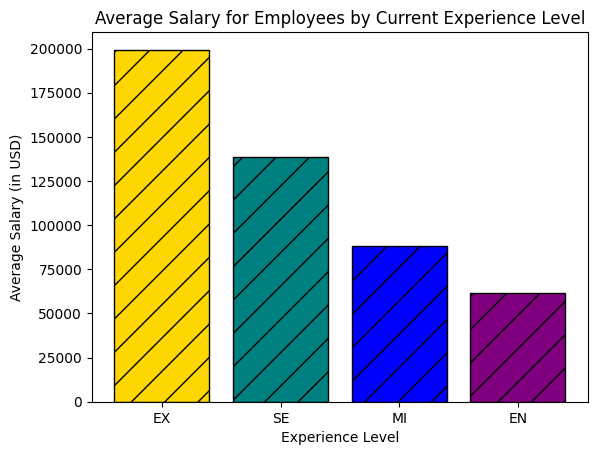

In [29]:
# Step 5: visualizing the average salaries for each experience level.
import matplotlib.pyplot as plt

summary_sorted = summary.sort_values(by="mean", ascending=False)
print(summary_sorted)

categories = summary_sorted.index
values = summary_sorted["mean"]

plt.bar(categories, values, color=['gold', 'teal', 'blue', 'purple'], edgecolor='black', hatch='/')
plt.title('Average Salary for Employees by Current Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (in USD)')
plt.show()

